In [156]:
#import kagglehub

"""
# Download latest version
path = kagglehub.dataset_download("Path to working directory", "dataset_name") # Esto es para descartar el dataset inicial, poner el path en tu ordenador local

print("Path to dataset files:", path)
"""

'\n# Download latest version\npath = kagglehub.dataset_download("Path to working directory", "dataset_name") # Esto es para descartar el dataset inicial, poner el path en tu ordenador local\n\nprint("Path to dataset files:", path)\n'

In [157]:
import pandas as pd
df = pd.read_csv('amazon_reviews.csv')
df.head() #Aqui podemos ver el dataset usado, varias columnas innecesarias

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [158]:
#Limpiar el dataset
dfSimple = df.drop(columns=['reviewerName', 'reviewTime', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'])
dfSimple.head()
#De inicio trabajaremos con un dataset masivamente simplificado para poder hacer pruebas, la columna unnamed:0 no se elimina porque es un identificador de la fila y puede ser util mas adelante


,Unnamed: 0,overall,reviewText
0,0,4.0,No issues.
1,1,5.0,"Purchased this for my device, it worked as adv..."
2,2,4.0,it works as expected. I should have sprung for...
3,3,5.0,This think has worked out great.Had a diff. br...
4,4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [159]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [160]:
# NLTK resources
nltk.download('stopwords') #Llista de stopwords + comunes
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lianbaguebatlle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lianbaguebatlle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
# Cleaning function : punctuation, numbers, URL, convert to lowercase, tokenize, remove stopwords.
"""
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    #words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text if word not in stop_words]
    return ' '.join(words)
"""

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Split text into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

In [ ]:
# Create a new DataFrame with cleaned reviewText and the overall column
dfCleaned = dfSimple.copy()
dfCleaned['reviewText'] = dfCleaned['reviewText'].apply(clean_text)  # Apply the cleaning function
#dfCleaned['overall'] = dfCleaned['overall']  # Include the overall column

print(dfCleaned.head())

TypeError: expected string or bytes-like object

In [ ]:
# Save the cleaned dataset 
dfCleaned.to_csv('amazon_reviews_Cleaned.csv', index=False)

print("Cleaned dataset saved as 'amazon_reviews_simpleBinaryCleaned.csv'")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = tfidf.fit_transform(dfCleaned['reviewText'])  

# y = Etiqueta
y = dfCleaned['overall']  

In [ ]:
# Això nomes per ara per visualitzar el resultat despres de TF-IDF. X : sparse matrix (4914,5000), sparse matrix es representa per coordenades ja que en gran part està buida
print(X)

In [ ]:
#Por ahora, trabajaremos con valores de 0 o 1 en la columna overall para tener un problema simple y poder de inicio identifcar de manera binaria si es positiva o negativa la review. Despues, querremos predecir la nota de la review por el texto con mas exactitud
dfSimpleBinary = dfSimple.copy()
dfSimpleBinary['overall'] = dfSimpleBinary['overall'].apply(lambda x: 1 if x > 2.5 else 0)
dfSimpleBinary['overall'].value_counts()
dfSimpleBinary.head(1000)

,Unnamed: 0,overall,reviewText
0,0,1,No issues.
1,1,1,"Purchased this for my device, it worked as adv..."
2,2,1,it works as expected. I should have sprung for...
3,3,1,This think has worked out great.Had a diff. br...
4,4,1,"Bought it with Retail Packaging, arrived legit..."
...,...,...,...
995,995,1,Gave my galaxy S4 plenty of memory and at a go...
996,996,1,Bought a digital recorder with a memory card s...
997,997,1,"Not much to say, its a memory card but it work..."
998,998,1,32 gig MicroSD card that costs less than a dol...


In [ ]:
#Guardamos el dataset limpio para no sobreescribirlo accidentalmente, este paso es solo una precaucion. solo falta borrar los nans
dfSimpleBinary.dropna(subset=["reviewText"], inplace=True)
dfSimpleBinary.to_csv('amazon_reviews_simpleBinary.csv', index=False)

In [ ]:
# Descarregar Natural Language Toolkit (NLTK): Llibreria python per treballar amb text
!pip install nltk

Resultados para Logistic Regression:
Accuracy: 0.9451
Precision: 0.9477
Recall: 0.9968
F1 Score: 0.9716
ROC AUC: 0.9638


Resultados para Random Forest:
Accuracy: 0.9440
Precision: 0.9449
Recall: 0.9989
F1 Score: 0.9712
ROC AUC: 0.9477




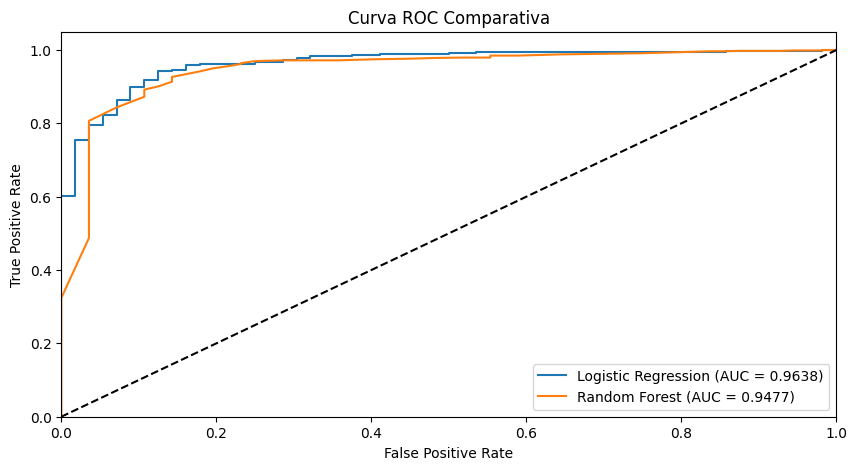

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Entrenar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Diccionario para almacenar los resultados
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Guardar los resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Crear el gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Definir las métricas de evaluación
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar cada modelo con validación cruzada
for model_name, model in models.items():
    print(f"Evaluando {model_name} con validación cruzada:")
    for metric_name, metric in scoring.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
        print(f"{metric_name}: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print("\n")

Evaluando Logistic Regression con validación cruzada:
accuracy: 0.9385 (+/- 0.0010)
precision: 0.9395 (+/- 0.0013)
recall: 0.9985 (+/- 0.0009)
f1: 0.9681 (+/- 0.0005)
roc_auc: 0.9602 (+/- 0.0083)


Evaluando Random Forest con validación cruzada:
accuracy: 0.9363 (+/- 0.0008)
precision: 0.9358 (+/- 0.0006)
recall: 0.9998 (+/- 0.0004)
f1: 0.9666 (+/- 0.0004)
roc_auc: 0.9459 (+/- 0.0124)




In [ ]:
# Train Naive Bayes
